   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

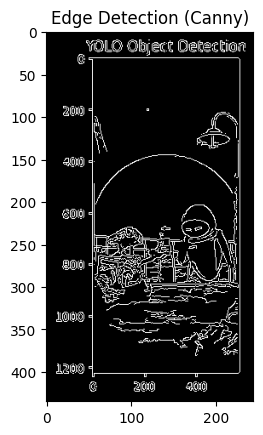

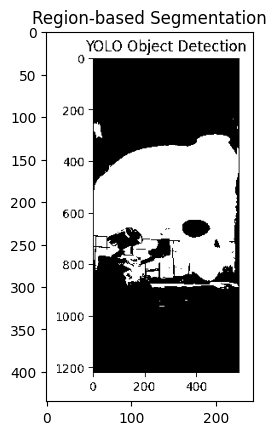

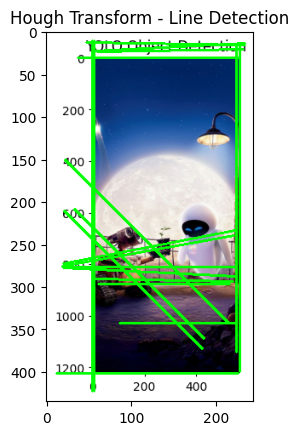

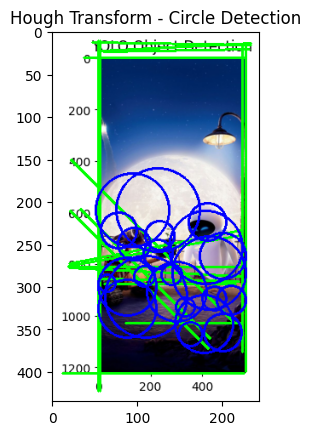

In [ ]:
### Task 1: Image Segmentation & Hough Transform

# Install required libraries
!pip install opencv-python ultralytics

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load image
image_path = '/content/image lab 6.png'  # Replace with actual path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Edge-based segmentation (Canny)
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.show()

## Region-based segmentation (Thresholding)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Region-based Segmentation")
plt.show()

## Hough Transform - Detecting Lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Line Detection")
plt.show()

## Hough Transform - Detecting Circles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=50)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Circle Detection")
plt.show()


image 1/1 /content/image lab 6.png: 640x384 (no detections), 158.0ms
Speed: 4.1ms preprocess, 158.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


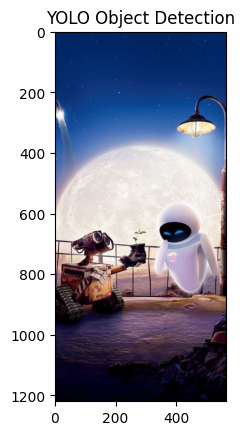

In [ ]:
### Task 2: Object Detection using YOLO

# Load YOLO model
yolo = YOLO("yolov8n.pt")  # Replace with actual YOLO weight file

# Perform detection
results = yolo(image_path)

# Display results
for result in results:
    result.show()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 307s 190ms/step - accuracy: 0.1929 - loss: 3.5022 - val_accuracy: 0.2960 - val_loss: 2.7929
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 291s 186ms/step - accuracy: 0.3451 - loss: 2.5290 - val_accuracy: 0.3133 - val_loss: 2.7269
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 290s 186ms/step - accuracy: 0.4069 - loss: 2.2528 - val_accuracy: 0.3355 - val_loss: 2.6922
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 319s 184ms/step - accuracy: 0.4535 - loss: 2.0239 - val_accuracy: 0.3392 - val_loss: 2.7622
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 367s 213ms/step - accuracy: 0.5067 - loss: 1.8104 - val_accuracy: 0.3341 - val_loss: 2.8978
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


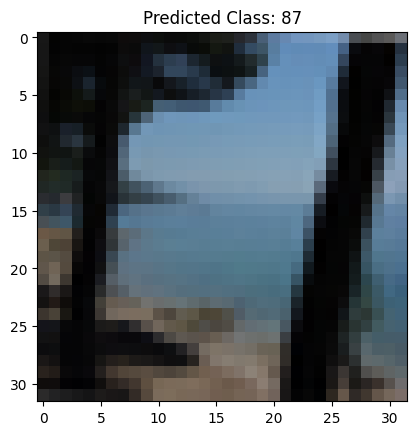

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

image = x_test[10]
pred = model.predict(image.reshape(1, 32, 32, 3))
pred_class = pred.argmax()

plt.imshow(image)
plt.title(f"Predicted Class: {pred_class}")
plt.show()